In [1]:
# 1.导入相应的库和模块

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [6]:
# 2.导入数据并查看数据

data = pd.read_excel('./datas/某公司员工属性.xls')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
离职          1470 non-null object
年龄          1470 non-null int64
出差          1470 non-null object
日效率         1470 non-null int64
部门          1470 non-null object
上班距离        1470 non-null int64
学历          1470 non-null int64
专业          1470 non-null object
雇佣次数        1470 non-null int64
员工号         1470 non-null int64
环境满意度       1470 non-null int64
性别          1470 non-null object
小时效率        1470 non-null int64
敬业度         1470 non-null int64
岗位等级        1470 non-null int64
职位          1470 non-null object
岗位满意度       1470 non-null int64
婚姻状态        1470 non-null object
月收入         1470 non-null int64
月效率         1470 non-null int64
历任公司数量      1470 non-null int64
是否满18岁      1470 non-null object
是否加班        1470 non-null object
加薪幅度        1470 non-null int64
绩效评估        1470 non-null int64
人际关系满意度     1470 non-null int64
标准工时        1470 non-null int64
期权          1470 non

,离职,年龄,出差,日效率,部门,上班距离,学历,专业,雇佣次数,员工号,...,人际关系满意度,标准工时,期权,总工龄,上年度培训时间,工作生活平衡度,司龄,岗龄,距上次升职时长,跟随现任领导时间
0,是,41,很少出差,1102,销售,1,2,生物工程,1,1,...,1,80,0,8,0,1,6,4,0,5
1,否,49,经常出差,279,研发,8,1,生物工程,1,2,...,4,80,1,10,3,3,10,7,1,7
2,是,37,很少出差,1373,研发,2,2,其他,1,4,...,2,80,0,7,3,3,0,0,0,0
3,否,33,经常出差,1392,研发,3,4,生物工程,1,5,...,3,80,0,8,3,3,8,7,3,0
4,否,27,很少出差,591,研发,2,1,药学,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# 3.数据清洗

#查看数据列列名
print("----------------------------------------------------数据列名----------------------------------------------------")
print(data.columns)
print()

#查看数据每一列的取值以及是否有异常
print("----------------------------------------------------数据列取值---------------------------------------------------")
for i in range(len(data.columns)):
    print(data.columns[i])
    print(data.iloc[:,i].unique().tolist())
    print()

----------------------------------------------------数据列名----------------------------------------------------
Index(['离职', '年龄', '出差', '日效率', '部门', '上班距离', '学历', '专业', '雇佣次数', '员工号',
       '环境满意度', '性别', '小时效率', '敬业度', '岗位等级', '职位', '岗位满意度', '婚姻状态', '月收入',
       '月效率', '历任公司数量', '是否满18岁', '是否加班', '加薪幅度', '绩效评估', '人际关系满意度', '标准工时',
       '期权', '总工龄', '上年度培训时间', '工作生活平衡度', '司龄', '岗龄', '距上次升职时长', '跟随现任领导时间'],
      dtype='object')

----------------------------------------------------数据列取值---------------------------------------------------
离职
['是', '否']

年龄
[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53, 24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54, 58, 20, 25, 19, 57, 52, 47, 18, 60]

出差
['很少出差', '经常出差', '不出差']

日效率
[1102, 279, 1373, 1392, 591, 1005, 1324, 1358, 216, 1299, 809, 153, 670, 1346, 103, 1389, 334, 1123, 1219, 371, 673, 1218, 419, 391, 699, 1282, 1125, 691, 477, 705, 924, 1459, 125, 895, 813, 1273, 869, 890, 852, 1141, 464, 1240, 135

In [4]:
# 4.数据预处理

#将非数字型数据替换成数据（独热编码）
for i in range(len(data.columns)):
    if str(data.iloc[0,i]).isdigit():
        pass
    else:
        if len(data.iloc[:,i].unique().tolist()) <= 3:
            labels = data.iloc[:,i].unique().tolist()
            data.iloc[:,i] = data.iloc[:,i].apply(lambda x: labels.index(x))
        else:
            le = preprocessing.LabelEncoder()
            le.fit(data.iloc[:,i].values.tolist())
            data.iloc[:,i] = le.transform(data.iloc[:,i].values.tolist())
#查看处理后的数据
data.head()

,离职,年龄,出差,日效率,部门,上班距离,学历,专业,雇佣次数,员工号,...,人际关系满意度,标准工时,期权,总工龄,上年度培训时间,工作生活平衡度,司龄,岗龄,距上次升职时长,跟随现任领导时间
0,0,41,0,1102,0,1,2,3,1,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,1,279,1,8,1,3,1,2,...,4,80,1,10,3,3,10,7,1,7
2,0,37,0,1373,1,2,2,1,1,4,...,2,80,0,7,3,3,0,0,0,0
3,1,33,1,1392,1,3,4,3,1,5,...,3,80,0,8,3,3,8,7,3,0
4,1,27,0,591,1,2,1,4,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# 5.数据主成分分析

#选择信息占比选超过99%
pca = PCA(n_components=0.99,svd_solver="full")
pca.fit(data.iloc[:,1:])

#查看新特征空间
print(pca.components_)
print()

#查看列索引与列名
for i in range(len(data.columns)):
    print(str(i)+'  '+data.columns[i])
print()

#通过新特征空间的系数占比与列名索引构建新特征矩阵
newdata = pca.transform(data.iloc[:,1:])
newdata = MinMaxScaler().fit_transform(newdata) #数据归一化
datas = pd.DataFrame(newdata,index=data.index,columns=['工作效益比','工作期望满意度']) #更新新特征名字

#连接新特征矩阵与离职列
data = pd.concat([datas,data.iloc[:,0]],axis=1)

#查看处理后最终的数据
data.head()

[[ 5.31766737e-05  1.23006690e-06 -1.81543064e-03 -1.85614060e-06
   3.07158089e-05 -3.37706969e-06  1.60477253e-06  1.44444746e-34
   1.04193586e-03  5.73793098e-06 -2.90996072e-06 -4.48275173e-05
  -1.67053282e-06  1.01290836e-05  1.03466188e-05  6.85559961e-08
  -2.24289441e-06  4.08313796e-02  9.99163854e-01  7.55263694e-06
  -0.00000000e+00 -1.36453714e-06 -3.68016952e-06 -5.19997851e-07
  -5.14477978e-07 -0.00000000e+00 -4.08390031e-06  5.16476775e-05
   1.59326592e-07  8.71624297e-07 -8.37848027e-06 -1.51553835e-06
   4.92333722e-06 -1.37329222e-05]
 [ 9.63953125e-04 -4.98111032e-06  8.39357169e-04 -5.80039655e-06
  -3.22781278e-05  2.10332200e-05 -9.90697125e-06 -3.85185989e-34
  -2.03249347e-03 -1.99588384e-06 -3.05419555e-06 -6.42381060e-05
  -2.15777729e-06  2.23154350e-04  9.28480543e-05 -1.68467421e-06
   1.19463485e-05  9.99162135e-01 -4.08277792e-02  7.88625506e-05
   0.00000000e+00 -4.57360445e-07 -2.09131669e-05 -1.26689876e-06
   6.01213818e-06  0.00000000e+00  1.3618

,工作效益比,工作期望满意度,离职
0,0.695346,0.266469,0
1,0.909228,0.211817,1
2,0.011660,0.105116,0
3,0.836240,0.103636,1
4,0.578408,0.145174,1


In [6]:
# 6.随机森林和决策树建模对比

Xtrain, Xtest, Ytrain, Ytest = model_selection.train_test_split(data.iloc[:,:2].values,data.iloc[:,-1].values,test_size=0.33)

clf = tree.DecisionTreeClassifier(random_state=0)
rfc = ensemble.RandomForestClassifier(random_state=0)

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)

score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

print("Single Tree:{}".format(score_c))
print("Random Forest:{}".format(score_r))

Single Tree:0.7716049382716049
Random Forest:0.8209876543209876


D:\Anconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


D:\Anconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in

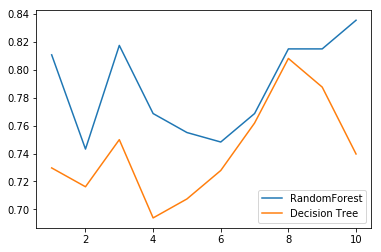

In [7]:
# 7. 随机森林和决策树在一组交叉验证下的效果对比

clf = tree.DecisionTreeClassifier()
clf_s = model_selection.cross_val_score(clf,data.iloc[:,:2].values,data.iloc[:,-1].values,cv=10)

rfc = ensemble.RandomForestClassifier()
rfc_s = model_selection.cross_val_score(rfc,data.iloc[:,:2].values,data.iloc[:,-1].values,cv=10)

plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()   

0.8436213991769548 71


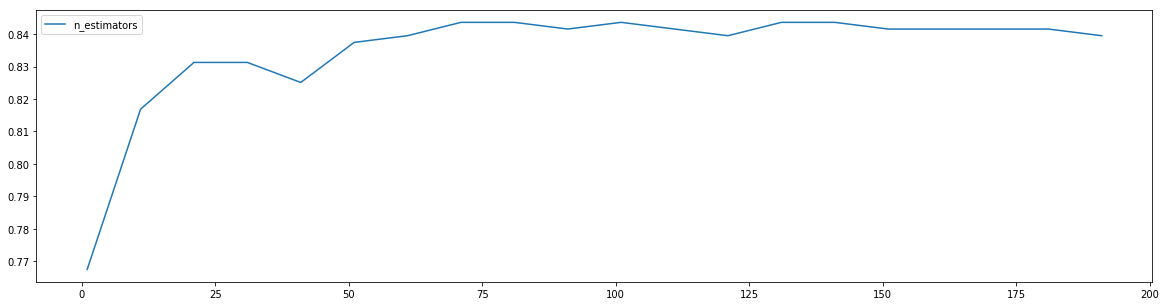

In [8]:
# 8.随机森林调整的第一步:调整n_estimators
#通过6,7我们选择随机森林

scores = []
for i in range(0,200,10):
    rfc = ensemble.RandomForestClassifier(n_estimators=i+1
                                          ,n_jobs=-1
                                          ,random_state=90)
    rfc = rfc.fit(Xtrain,Ytrain)
    score = rfc.score(Xtest,Ytest)
    scores.append(score)
    
print(max(scores),(scores.index(max(scores))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scores,label="n_estimators")
plt.legend()
plt.show()

0.8477366255144033 67


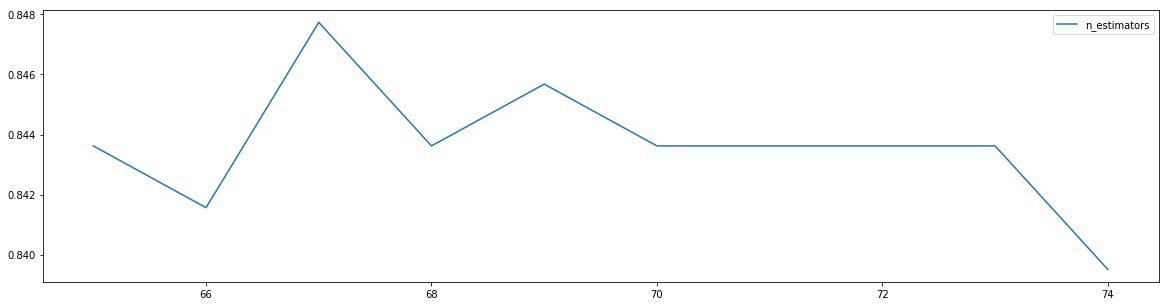

In [10]:
# 9.在确定好的范围内，进一步细化学习曲线
scores = []
for i in range(65,75):
    rfc = ensemble.RandomForestClassifier(n_estimators=i
                                          ,n_jobs=-1
                                          ,random_state=90)
    rfc = rfc.fit(Xtrain,Ytrain)
    score = rfc.score(Xtest,Ytest)
    scores.append(score)
    
print(max(scores),([*range(65,75)][scores.index(max(scores))]))
plt.figure(figsize=[20,5])
plt.plot(range(65,75),scores,label="n_estimators")
plt.legend()
plt.show()

0.8662551440329218 5


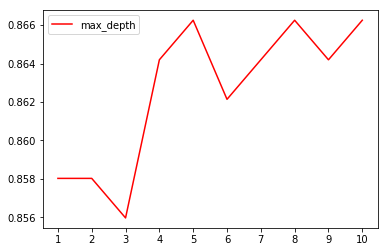

In [11]:
# 10.随机森林调整的第二步:调整max_depth

scores = []
for i in range(10):
    rfc = ensemble.RandomForestClassifier(max_depth=i+1
                                          ,n_estimators=67
                                          ,n_jobs=-1
                                          ,random_state=90)
    rfc = rfc.fit(Xtrain,Ytrain)
    score = rfc.score(Xtest,Ytest)
    scores.append(score)
    
print(max(scores),([*range(1,11)][scores.index(max(scores))]))
plt.plot(range(1,11),scores,color="red",label="max_depth")
plt.xticks(range(1,11))
plt.legend()
plt.show()

0.8662551440329218 1


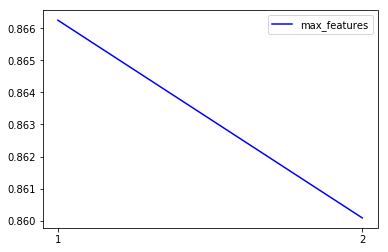

In [29]:
# 11.随机森林调整的第四步:调整max_features
scores = []
for i in range(1,3,1):
    rfc = ensemble.RandomForestClassifier(max_features=i
                                          ,max_depth=8
                                          ,n_estimators=35
                                          ,n_jobs=-1
                                          ,random_state=90)
    rfc = rfc.fit(Xtrain,Ytrain)
    score = rfc.score(Xtest,Ytest)
    scores.append(score)
    
print(max(scores),([*range(1,3,1)][scores.index(max(scores))]))
plt.plot(range(1,3,1),scores,color="blue",label="max_features")
plt.xticks(range(1,3,1))
plt.legend()
plt.show()

0.8662551440329218 1


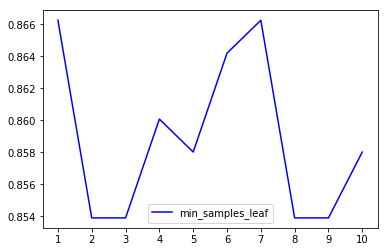

In [30]:
# 12.随机森林调整的第四步:调整min_samples_leaf
scores = []
for i in range(1,11):
    rfc = ensemble.RandomForestClassifier(min_samples_leaf=i
                                          ,max_features=1
                                          ,max_depth=8
                                          ,n_estimators=35
                                          ,n_jobs=-1
                                          ,random_state=90)
    rfc = rfc.fit(Xtrain,Ytrain)
    score = rfc.score(Xtest,Ytest)
    scores.append(score)
    
print(max(scores),([*range(1,11)][scores.index(max(scores))]))
plt.plot(range(1,11),scores,color="blue",label="min_samples_leaf")
plt.xticks(range(1,11))
plt.legend()
plt.show()

0.8662551440329218 2


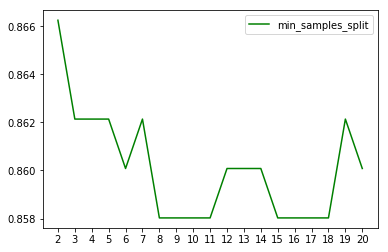

In [31]:
# 13.随机森林调整的第五步:调整min_samples_split
scores = []
for i in range(2,21):
    rfc = ensemble.RandomForestClassifier(min_samples_split=i,
                                 min_samples_leaf=1,
                                 max_features=1,
                                 max_depth=8,
                                 n_estimators=35,
                                 n_jobs=-1,
                                 random_state=90)
    rfc = rfc.fit(Xtrain,Ytrain)
    score = rfc.score(Xtest,Ytest)
    scores.append(score)
    
print(max(scores),([*range(2,21)][scores.index(max(scores))]))
plt.plot(range(2,21),scores,color="green",label="min_samples_split")
plt.xticks(range(2,21))
plt.legend()
plt.show()

In [32]:
# 14.随机森林调整的第六步:调整criterion
scores = []
criterions = ['entropy','gini']
for i in criterions:
    rfc = ensemble.RandomForestClassifier(criterion=i,
                                     min_samples_split=2,
                                     min_samples_leaf=1,
                                     max_features=1,
                                     max_depth=8,
                                     n_estimators=35,
                                     n_jobs=-1,
                                     random_state=90)
    rfc = rfc.fit(Xtrain,Ytrain)
    score = rfc.score(Xtest,Ytest)
    scores.append(score)
[*zip(criterions,scores)]

[('entropy', 0.8600823045267489), ('gini', 0.8662551440329218)]